# (1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('cdata.csv')
 
def kmeans(k, plot_or_not):    
    def plot():
        plt.figure(figsize=(12,7)) #設圖表大小
        plt.xlabel('x') #設x軸名稱
        plt.ylabel('y') #設y軸名稱
        plt.title('Round {}'.format(j)) #設標題，每次會加1
        plt.scatter(df[df['closest'].str.contains('d0')]['x'], df[df['closest'].str.contains('d0')]['y'], c = 'red') #把離第一個中心點最近的點變成紅色印出來
        plt.scatter(df[df['closest'].str.contains('d1')]['x'], df[df['closest'].str.contains('d1')]['y'], c = 'green') #把離第二個中心點最近的點變成綠色印出來
        plt.scatter(df[df['closest'].str.contains('d2')]['x'], df[df['closest'].str.contains('d2')]['y'], c = 'blue') #把離第三個中心點最近的點變成藍色印出來
        plt.scatter(df[df['closest'].str.contains('d3')]['x'], df[df['closest'].str.contains('d3')]['y'], c = 'orange') #把離第四個中心點最近的點變成橘色印出來
        plt.scatter(centroids['x'], centroids['y'],  marker = 'x', c = 'black', s = 200) #把中心點設成黑色叉叉印出來
        plt.legend(labels = ['A', 'B', 'C', 'D', 'Centroid']) #設標籤
        
    centroids = df.sample(k)[['x', 'y']] #隨機從data取k個值當中心點
    centroids.index = ['d{}'.format(i) for i in range(k)] #更改index名稱
    new_centroids = df.sample(k)[['x', 'y']] #隨機從data取k個值當新中心點
    new_centroids.index = ['d{}'.format(i) for i in range(k)] #更改index名稱
    j = 1
    while not new_centroids.equals(centroids): #當新中心點不等於舊中心點時進入迴圈
        centroids = new_centroids 
        for i in range(k):
            df['d{}'.format(i)] = np.sqrt((df['x'] - centroids.iloc[i]['x']) ** 2
                                                    + (df['y'] - centroids.iloc[i]['y']) ** 2) #算每個點離中心點的距離
        df['closest'] = df[['d{}'.format(i) for i in range(k)]].idxmin(axis=1) #創新一欄為離哪個中心點距離最近
        if plot_or_not:
            plot()
        j += 1
        d = {}
        for i in range(k):
            d['d{}'.format(i)] = df[df['closest'].str.contains('d{}'.format(i))][['x', 'y']].mean() #創字典，一個中心點對到屬於這個中心點的點的平均座標
        new_centroids = pd.DataFrame(d).T #創新dataframe為新中心點的x,y座標

    c = centroids.loc[df['closest'], :]
    c.set_axis([i for i in range(300)], inplace=True)
    df['se'] = np.sqrt((df['x'] - c['x']) ** 2 + (df['y'] - c['y']) ** 2) #算SE
    return df['se'].sum() #算SSE
    
kmeans(4, plot_or_not = True)

ModuleNotFoundError: No module named 'pandas'

# (2)

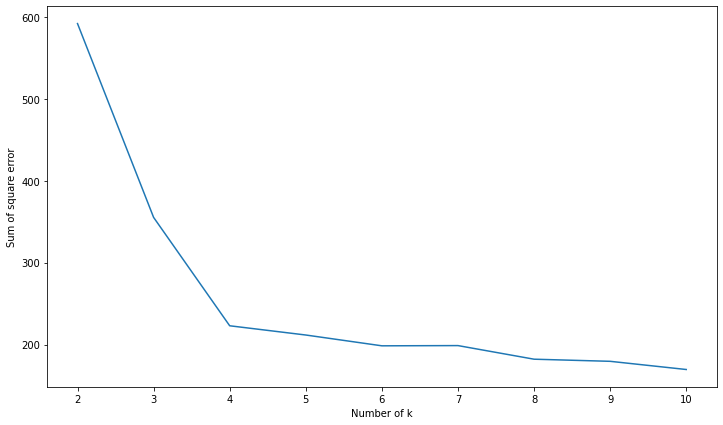

In [ ]:
sses = []
for K in range(2, 11):
    sses.append(kmeans(K, False)) #算出不同K的SSE並存到一個list

plt.figure(figsize=(12,7))
plt.xlabel('Number of k')
plt.ylabel('Sum of square error')
plt.plot(range(2, 11), sses) #畫出折線圖並設x軸y軸範圍

# (3)

(110.0, 200.0)

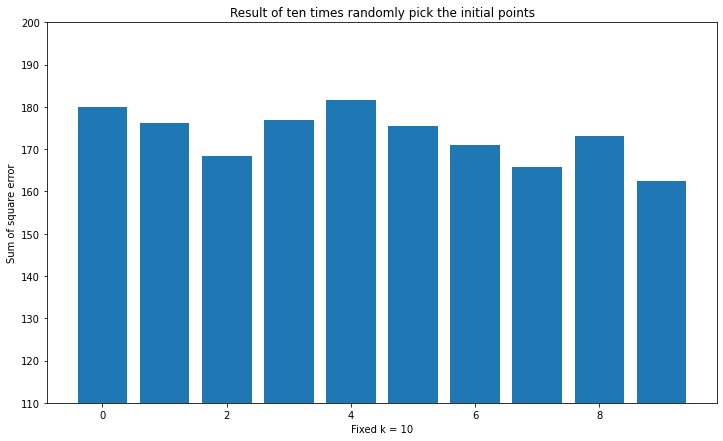

In [ ]:
sses = []
for i in range(10):
    sses.append(kmeans(10, False)) #算十次k=10的SSE

plt.figure(figsize=(12,7))
plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of square error')
plt.title('Result of ten times randomly pick the initial points')
plt.bar([i for i in range(10)], sses) #畫出長條圖
plt.ylim(110, 200) #設y軸範圍